<a href="https://colab.research.google.com/github/lilianabs/saturdays_ai_class/blob/main/clase_2_2_experiments_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
batch_size = 20

#transform = transforms.ToTensor()
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0, 1)
])

#We load the train and test sets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

#Create dataloader objects for the train and test data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [23]:
# We obtain one batch from the dataloader
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

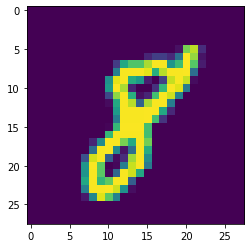

In [24]:
plt.figure()
plt.imshow(np.squeeze(images[17]))

In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
# We create the Neural Network

class MultiLayerPerceptron(nn.Module):

  def __init__(self):
    super(MultiLayerPerceptron, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear_relu_stack(x)
    return x

In [27]:
model = MultiLayerPerceptron()
print(model)

MultiLayerPerceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
epochs = 5
model.train()

for epoch in range(epochs):

  train_loss = 0.0

  for data, target in train_loader:

    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader.dataset)

  print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss}')

Epoch: 1 	Training Loss: 0.2798925485669048
Epoch: 2 	Training Loss: 0.2019147421311912
Epoch: 3 	Training Loss: 0.18264571608519473
Epoch: 4 	Training Loss: 0.17324202033555614
Epoch: 5 	Training Loss: 0.1587760350441793


In [30]:
test_loss = 0.0

model.eval()

for data, target in test_loader:

  output = model(data)
  loss = criterion(output, target)
  test_loss += loss.item()*data.size(0)

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 0.290145



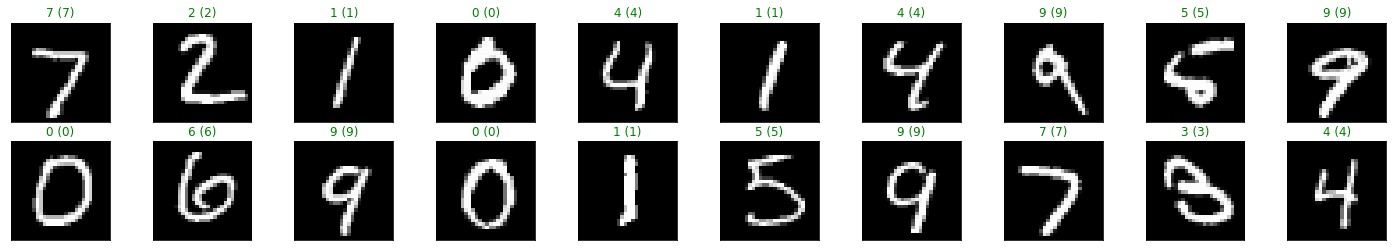

In [31]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))